In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2 as cv
import time 

from my_constants import *
from visualisation import *
from detect_give_way import *

In [2]:
# only for ipynb
########################## direcotry related

# ------------------------ often modified
CURRENT_DIR = 2 

# ------------------------ often left alone
SIGN_DIR = "./my-dataset/give-way/"
CAMERA_DIR = "phone-cam"
# CAMERA_DIR = "phone-cam"
DATA_DIR = SIGN_DIR + CAMERA_DIR

ORIGINAL_DATA = "the_dataset"
DOWNSCALED_DATA = "downscaled_352x288"
NO_DATA_SEPARATION = ""

all_gw_dirs = sorted(os.listdir(DATA_DIR))
print(all_gw_dirs)
for i in range(0, len(all_gw_dirs)):
    all_gw_dirs[i] = os.path.join(DATA_DIR, all_gw_dirs[i])

GIVE_WAY_DIR = os.path.join(all_gw_dirs[CURRENT_DIR], NO_DATA_SEPARATION)

['angled_signs', 'calibration', 'dark_distance_stresser_test', 'easy_thick_sign_set', 'easy_thin_sign_set', 'fun_uni_groza_set', 'single_sign_neighborhood_set']


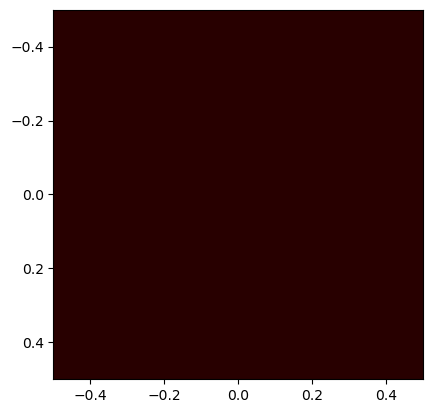

In [3]:

view_hsv_pixel(0, 255, 40)
# view_hsv_pixel(ALLOWED_RED_HUE_OFFSET, DARK_MIN_RED_SATURATION, DARK_MIN_RED_VALUE)
# view_hsv_pixel(ALLOWED_RED_HUE_OFFSET, BRIGHT_MIN_RED_SATURATION, VALUE_DELIMITER)

In [4]:
# downscale by hand every image

def downscale_images(gw_images):
    for i in range(len(gw_images)):
        gw_images[i] = cv.medianBlur(gw_images[i], 5)
        gw_images[i] = cv.resize(gw_images[i], (240, 320))
    return gw_images

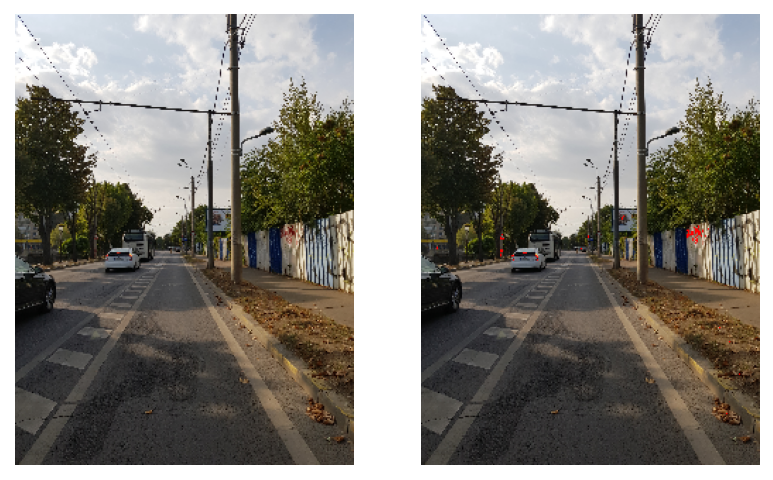

In [5]:
CUR_IMG = 43
imagesToView = [0]

gw_images = []
for img_name in sorted(os.listdir(GIVE_WAY_DIR)):
    # UNCOMMENT for desired rotation

    # gw_images.append(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name)))
    # gw_images.append(np.rot90(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name))))
    # gw_images.append(np.rot90(np.rot90(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name)))))
    gw_images.append(np.rot90(np.rot90(np.rot90(mpimg.imread(os.path.join(GIVE_WAY_DIR, img_name))))))

downscale_images(gw_images)

view_red_in_pictures(gw_images, imagesToView)

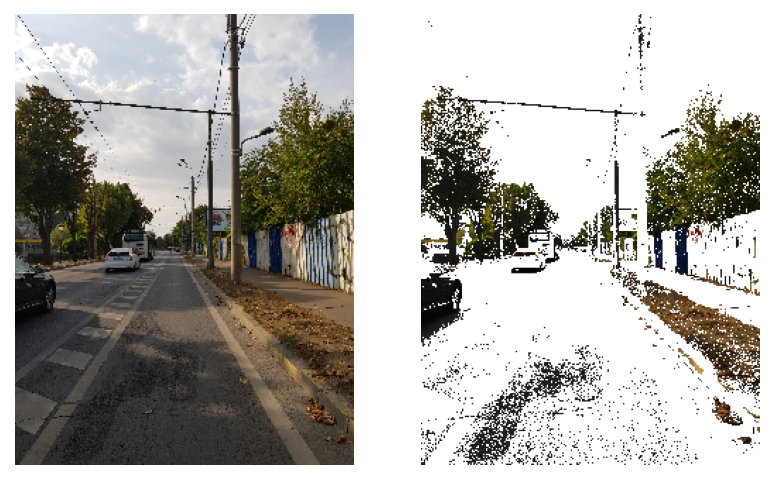

In [6]:
view_white_in_pictures(gw_images, imagesToView)

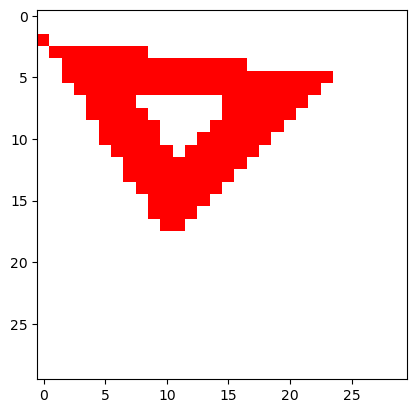

In [7]:
p_image = gw_images[0][0:30, 0:30].copy()
whiteout_img(p_image)
drwa_gw(p_image, give_way_chunk(point(0, 2), point(24, 5), point(10, 18)))

plt.imshow(p_image)

12
pic 0
too much red outside: 0.42857142857142855
avg time 0.28289246559143066


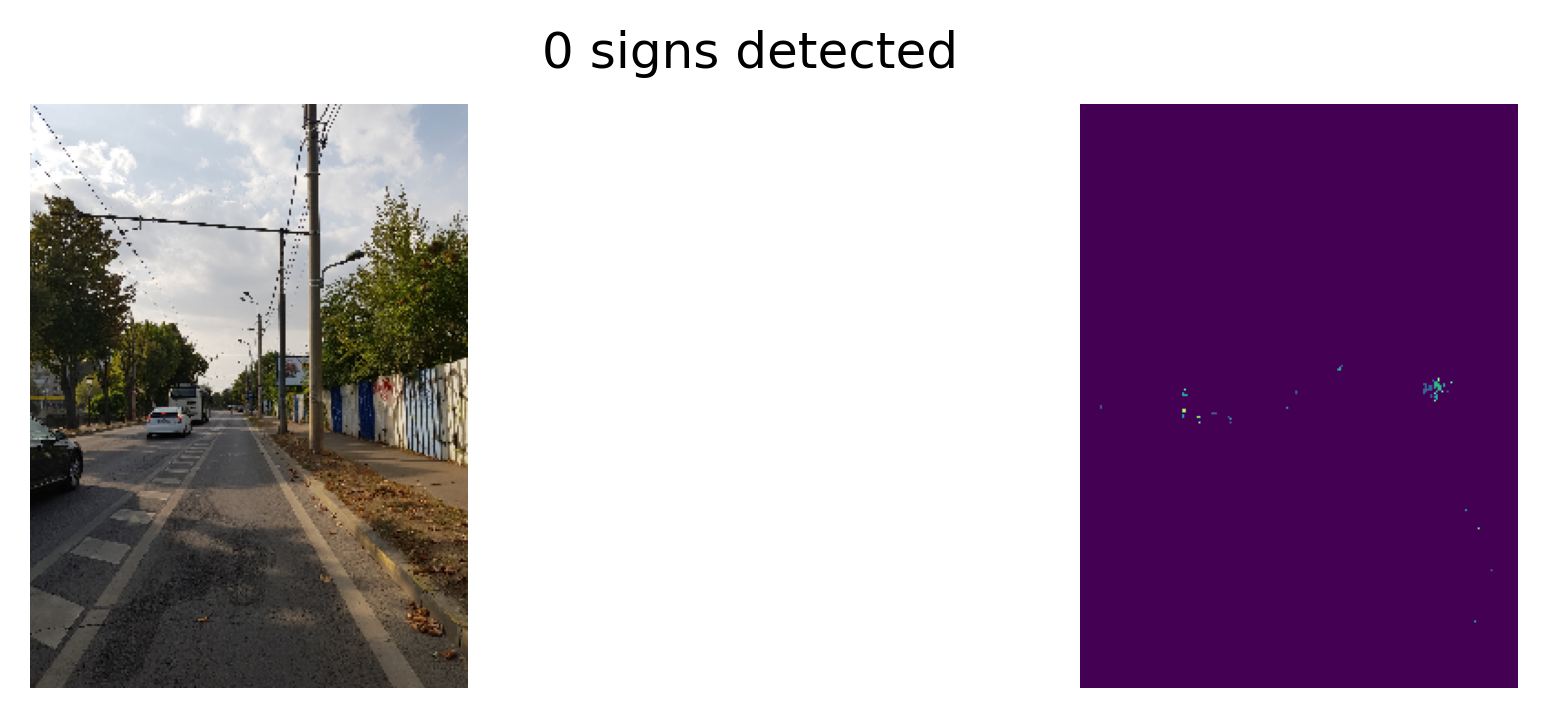

pic 1
avg time 0.28272533416748047


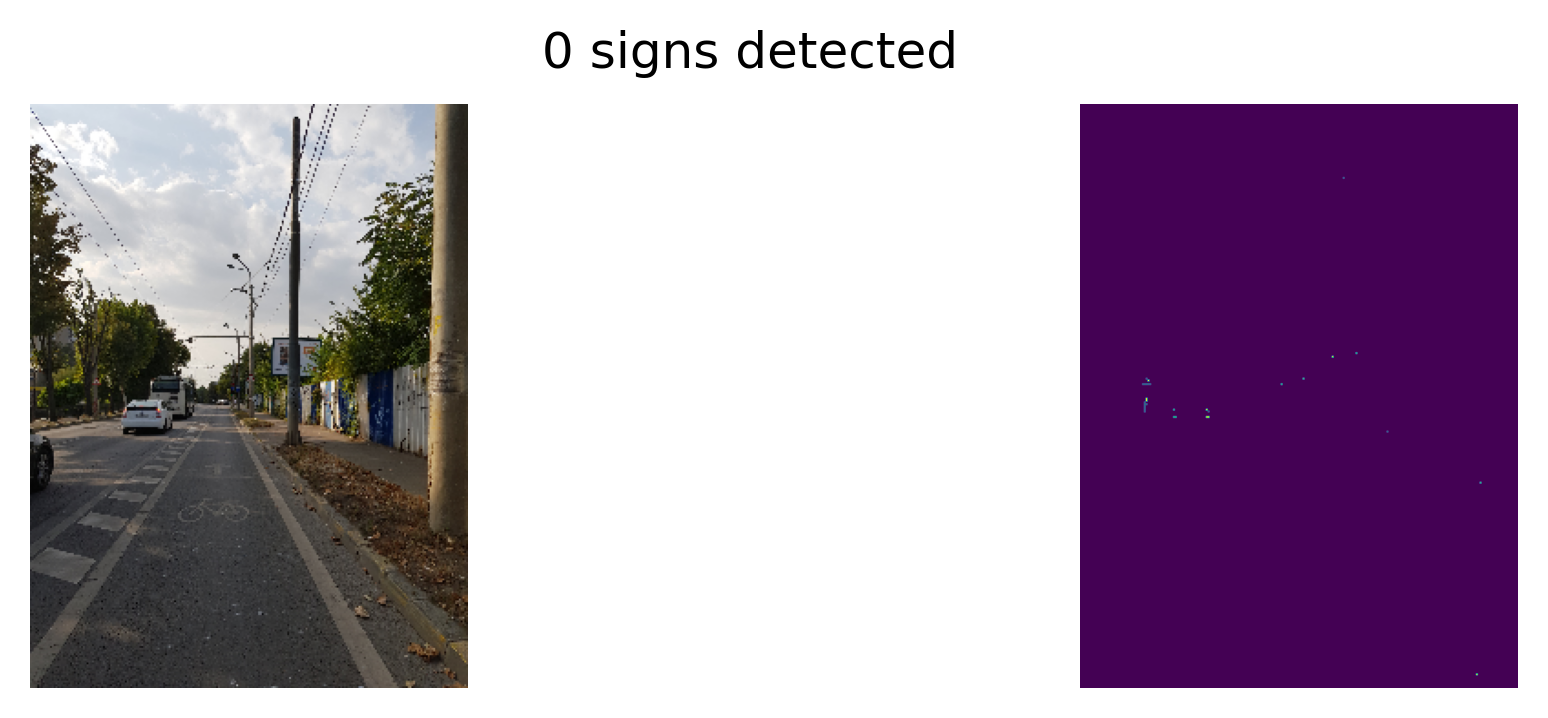

pic 2
avg time 0.2833592891693115


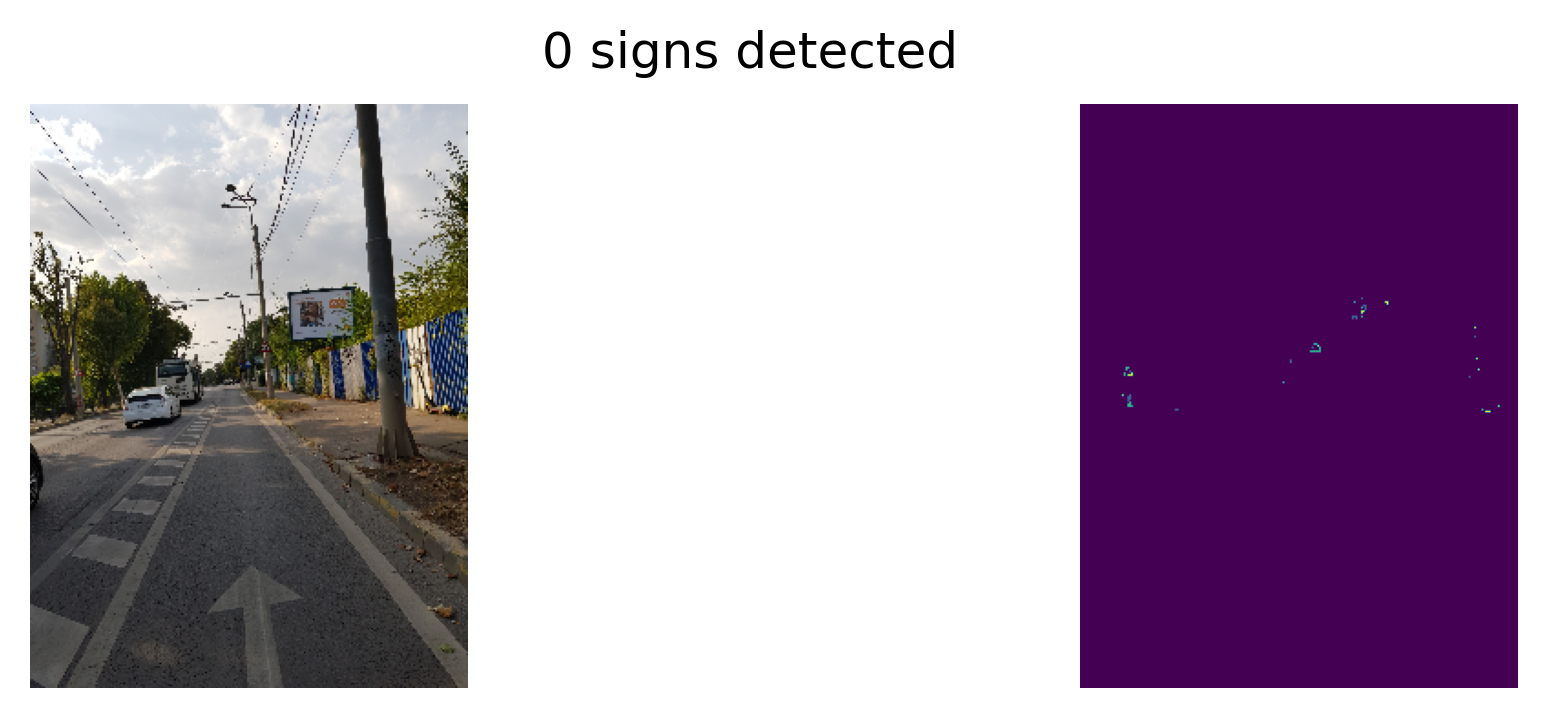

pic 3
avg time 0.2859795093536377


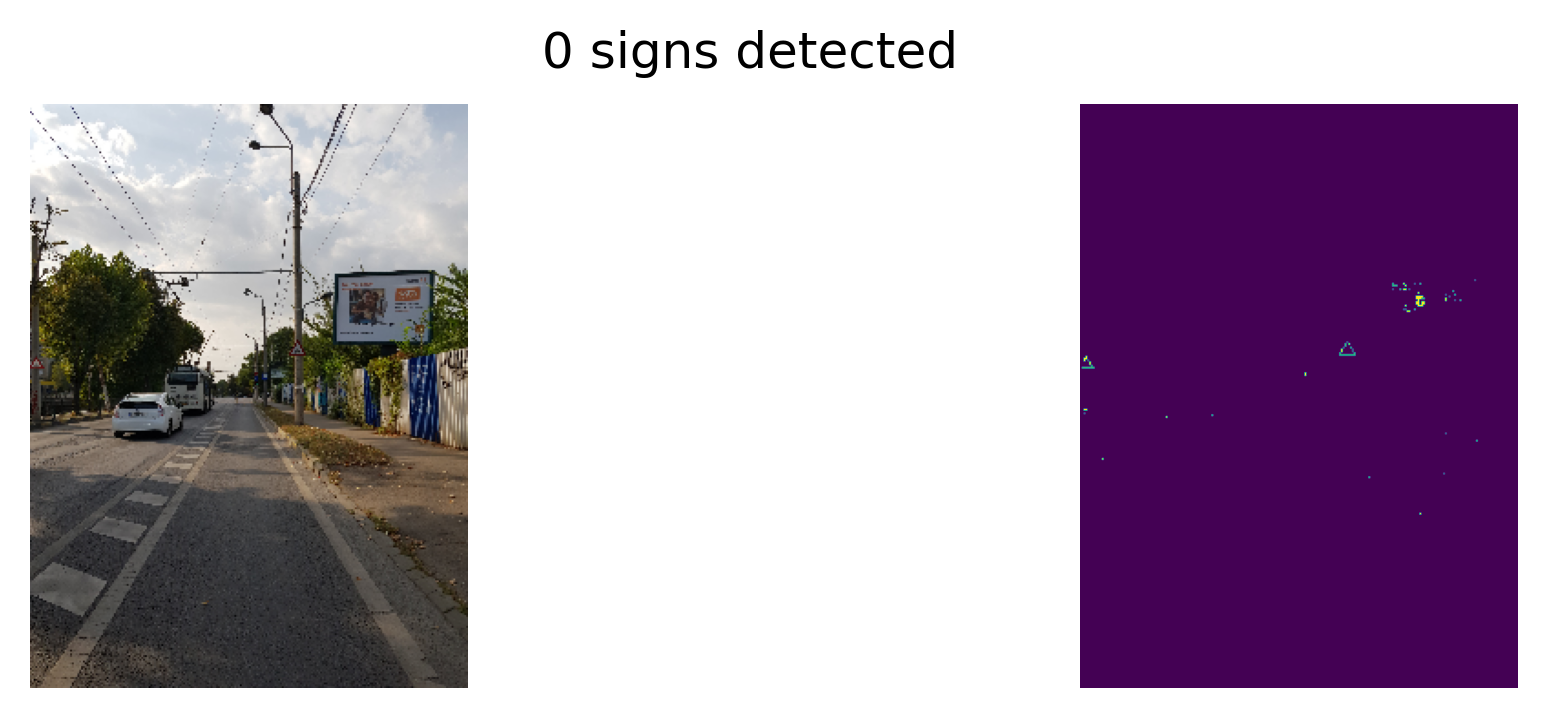

pic 4
avg time 0.28451905250549314


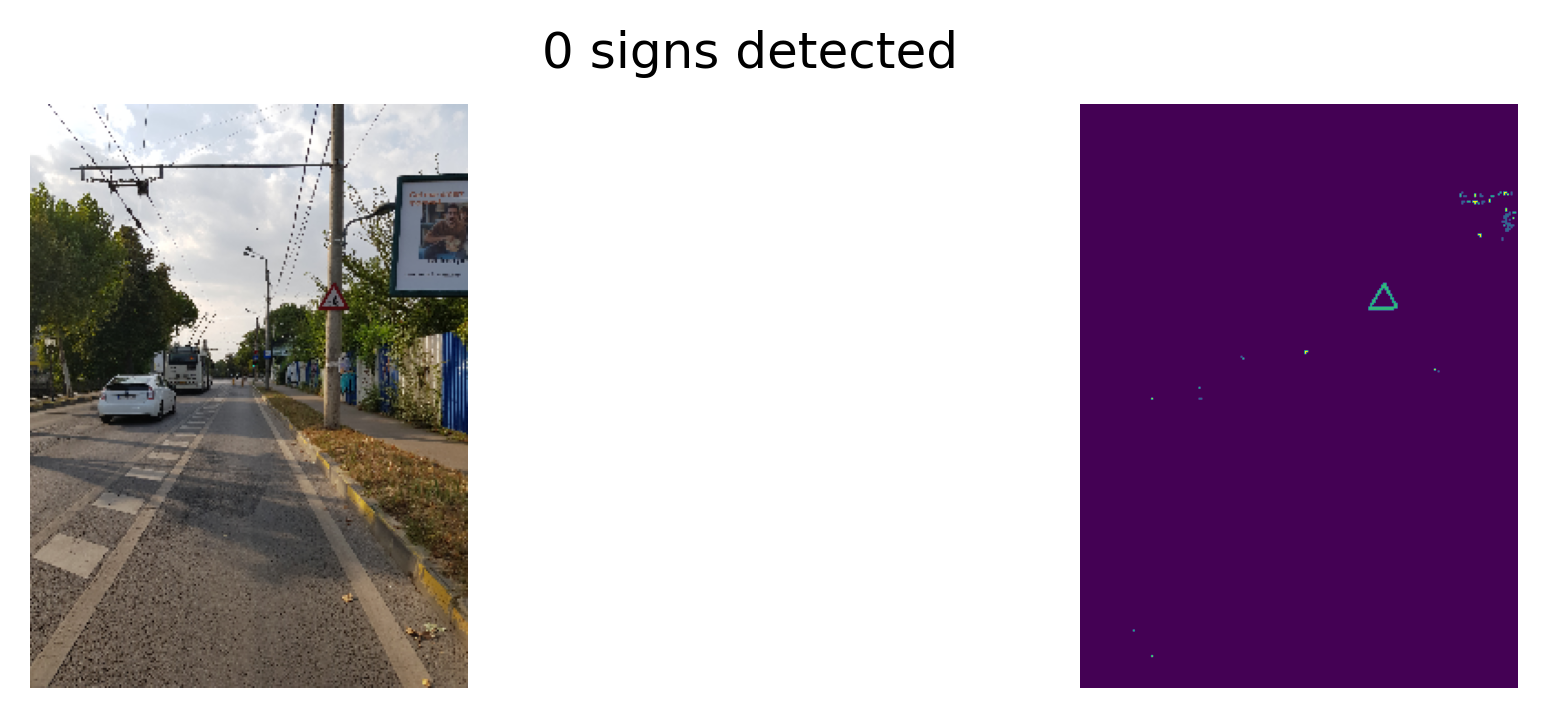

pic 5
avg time 0.2807706594467163


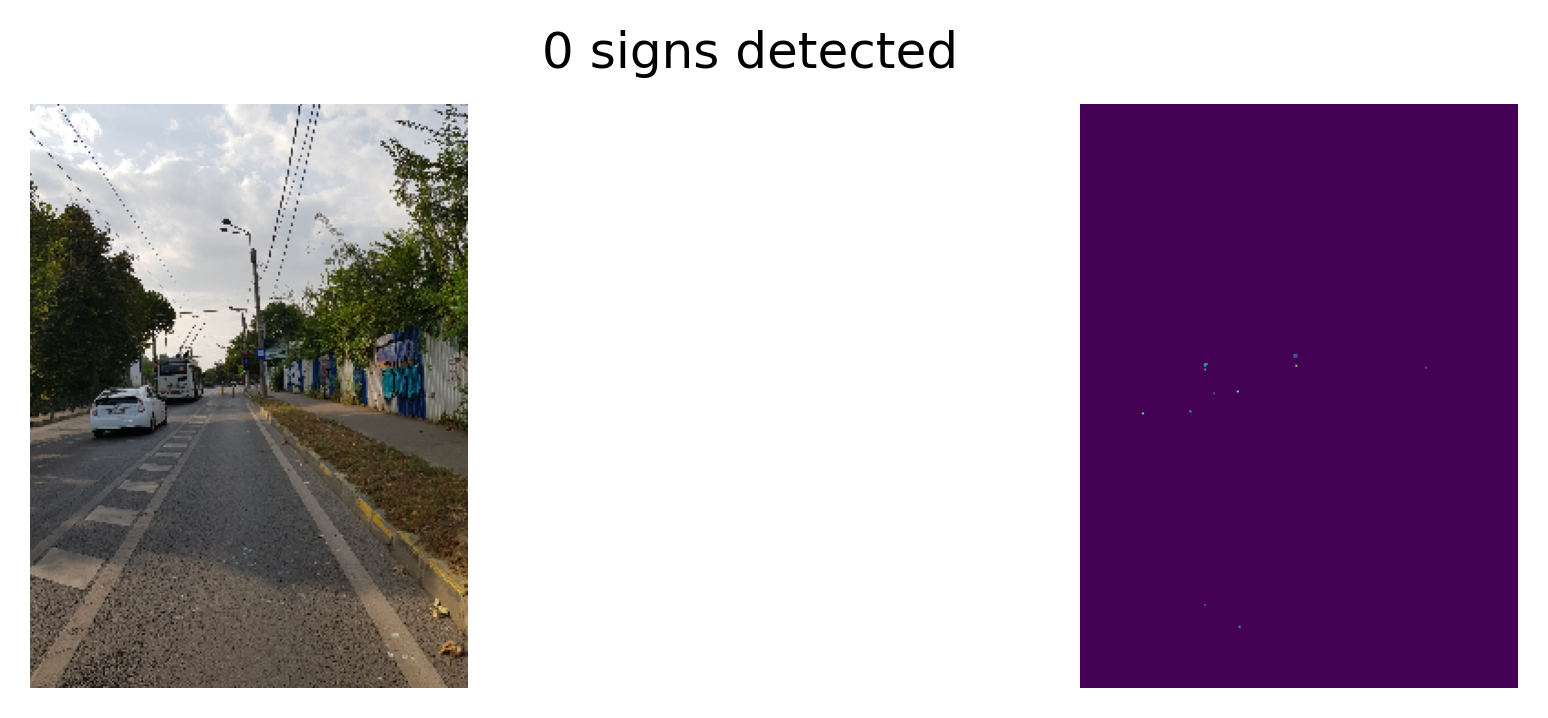

pic 6
avg time 0.27140709332057406


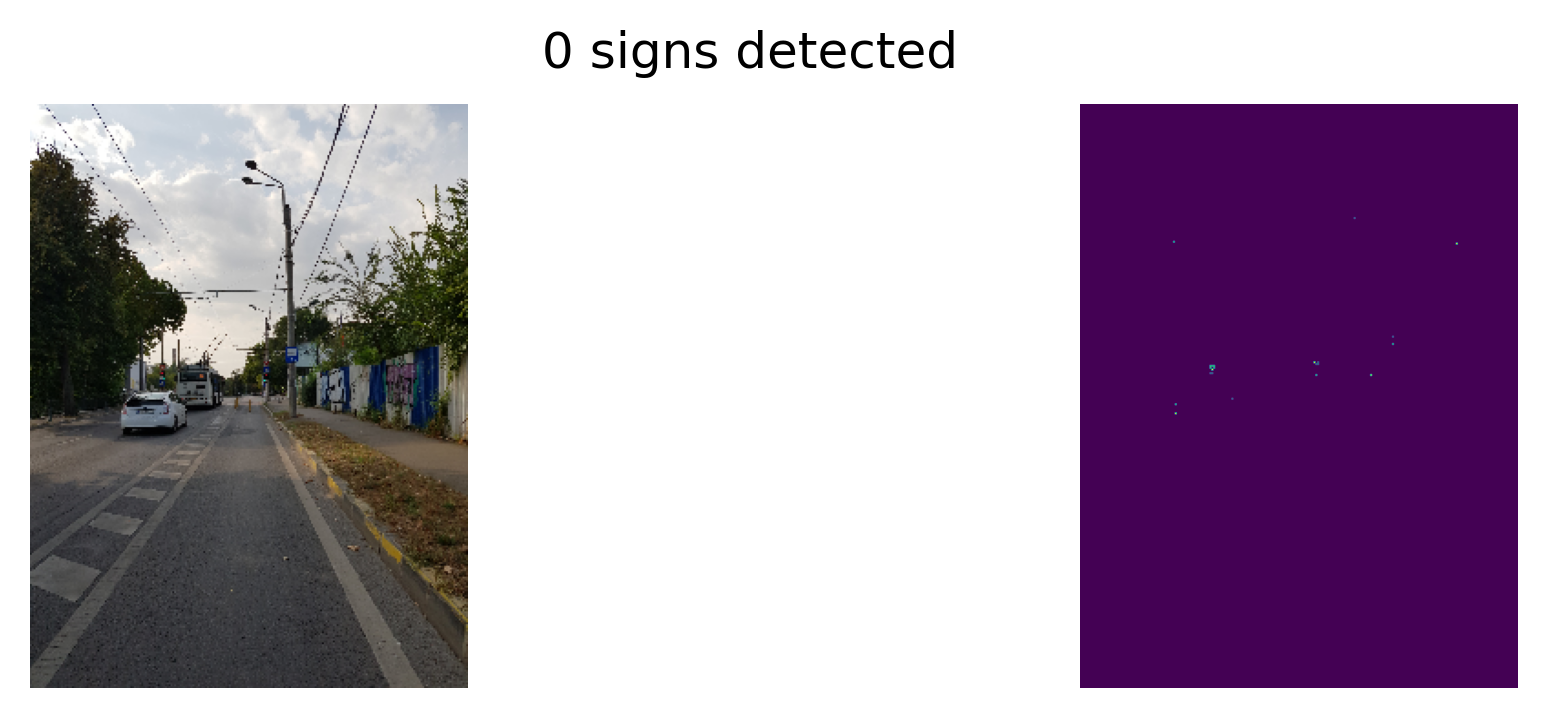

pic 7
avg time 0.2676374316215515


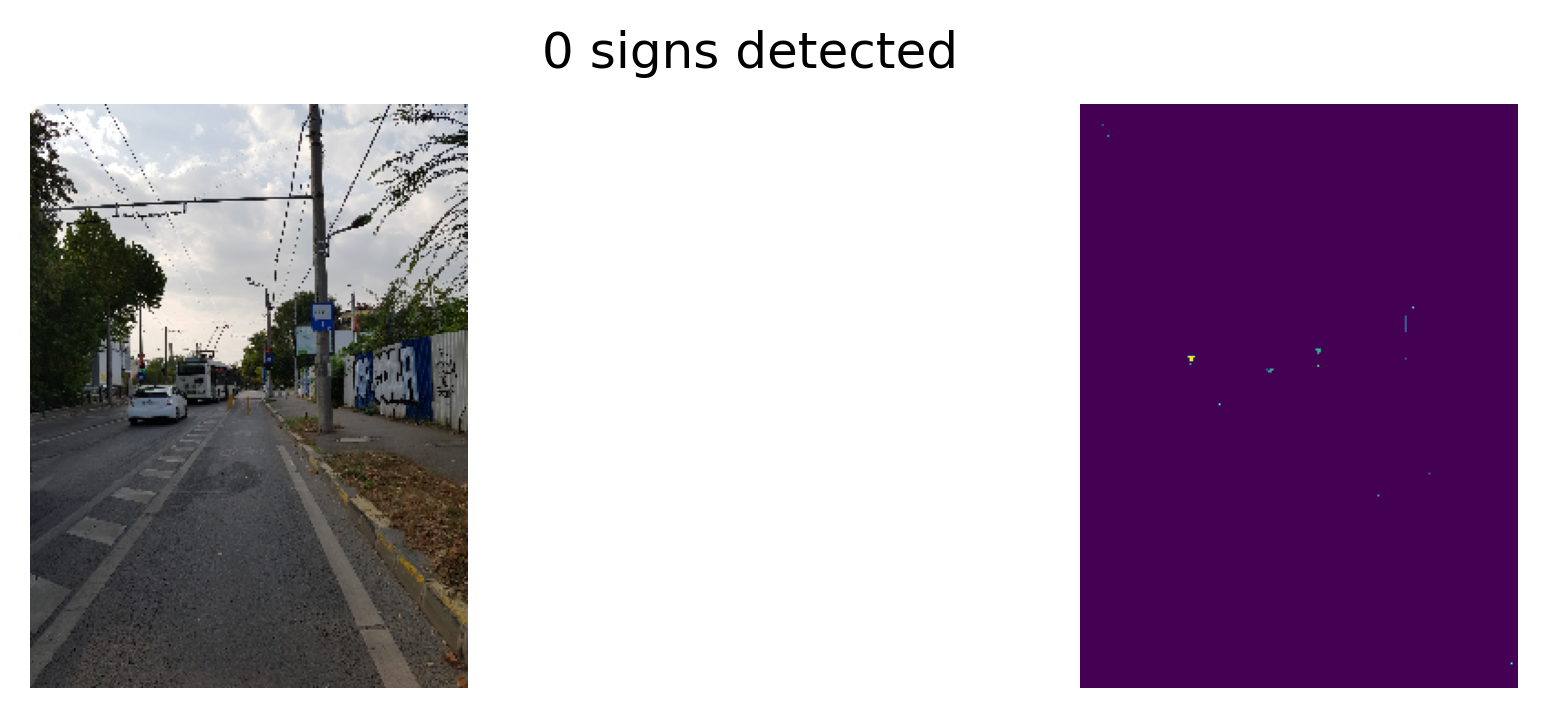

pic 8
outer: 0.9863022345663527 inner 1.0019879440810553
avg time 0.2802874512142605


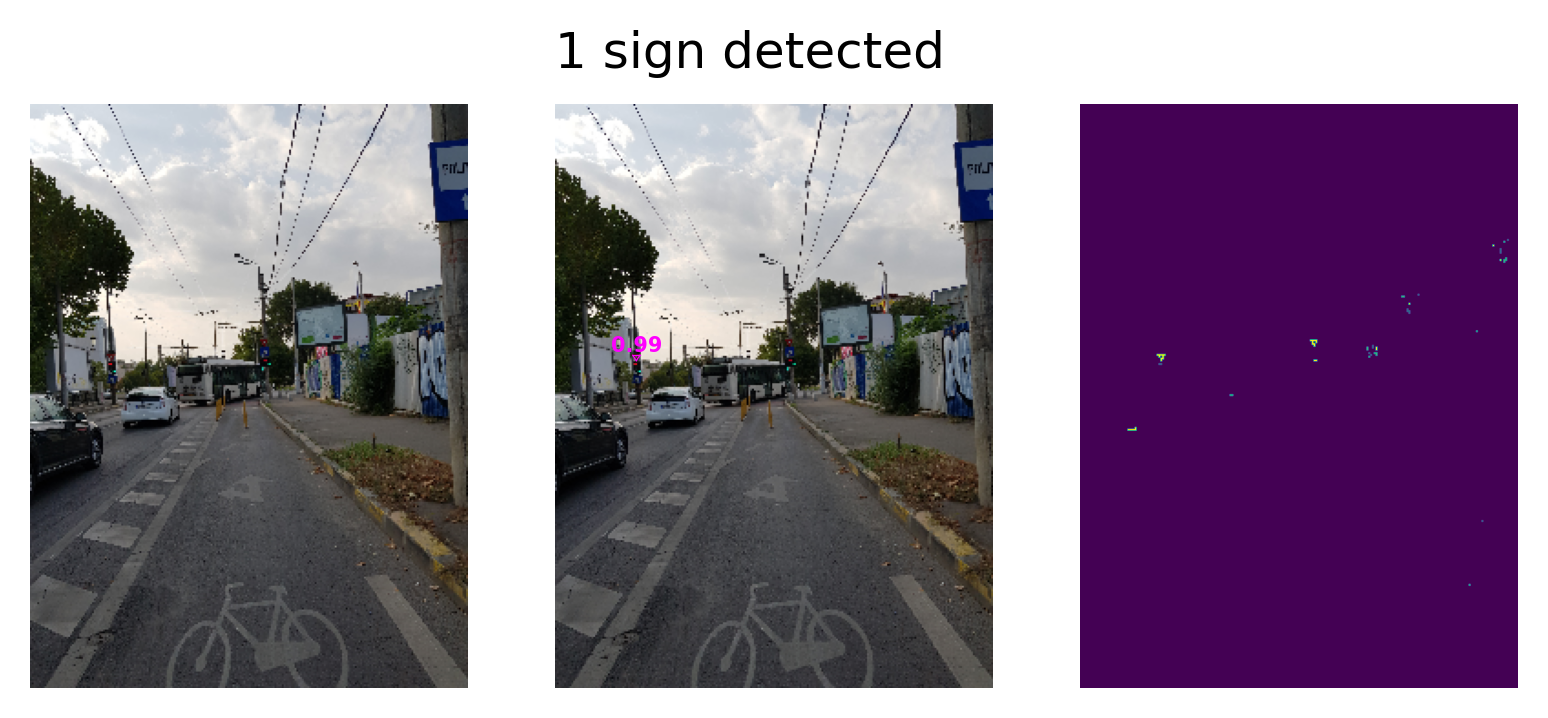

pic 9
too much red outside: 0.625
avg time 0.27357921600341795


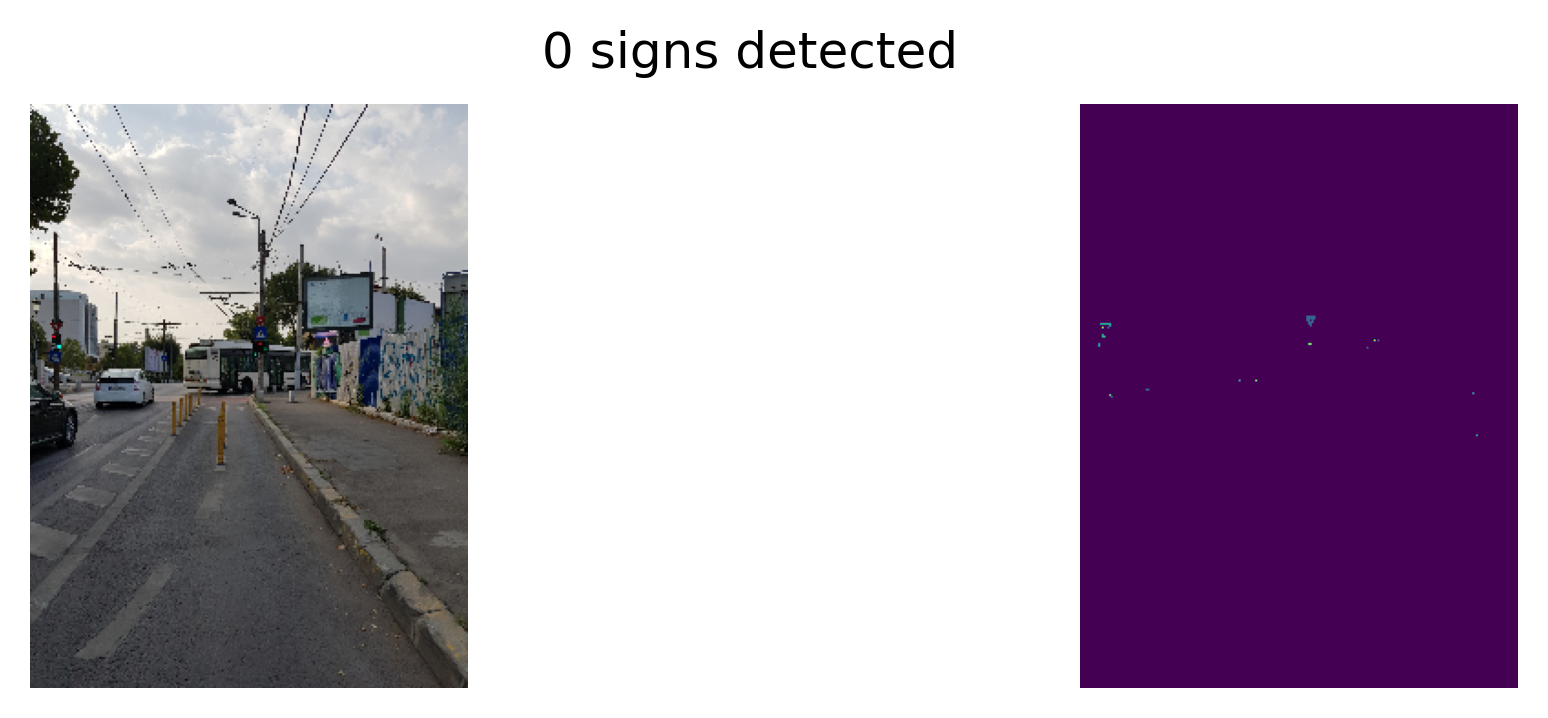

pic 10
outer: 0.8454019153425809 inner 0.981539210528382
avg time 0.27905412153764203


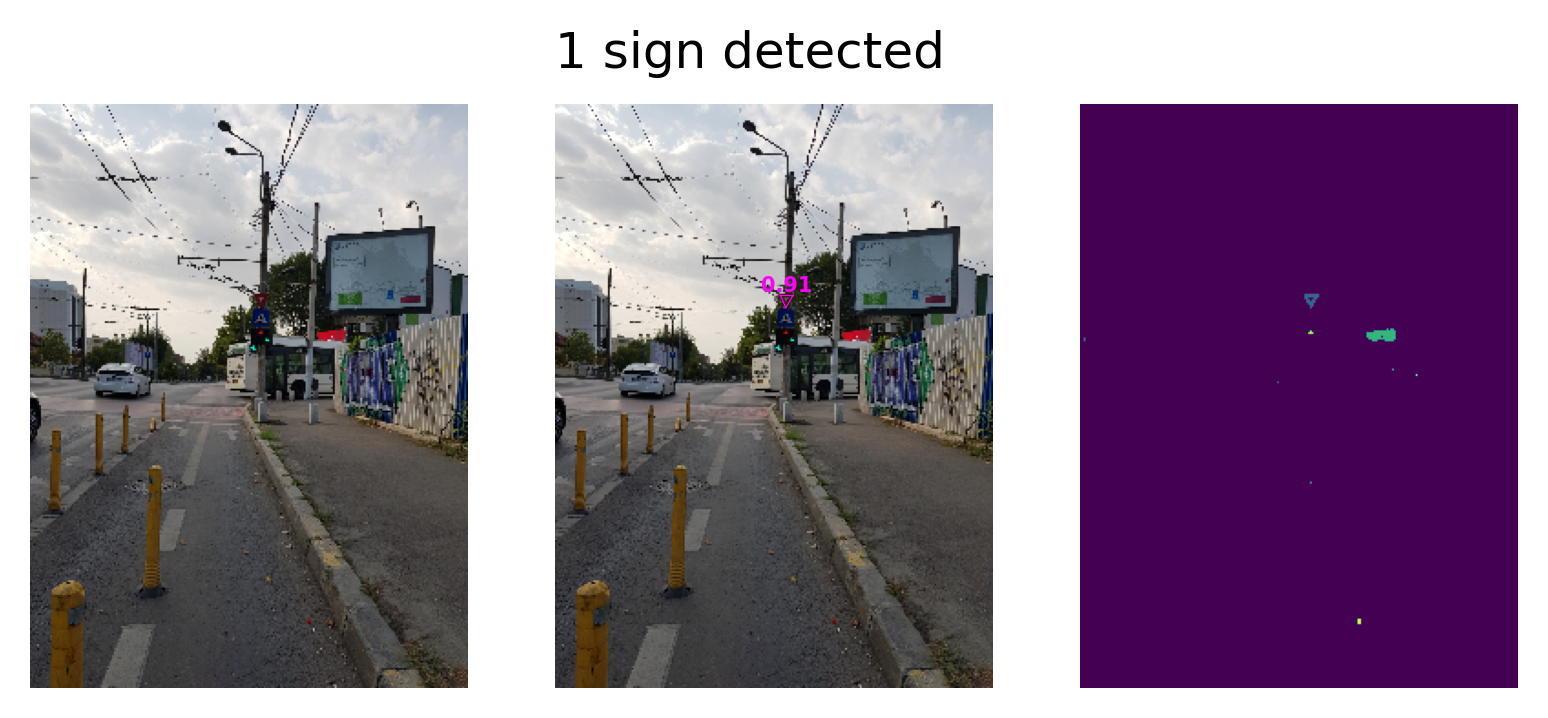

pic 11
outer: 0.8908536312212185 inner 0.9419610165554627
avg time 0.27382612228393555


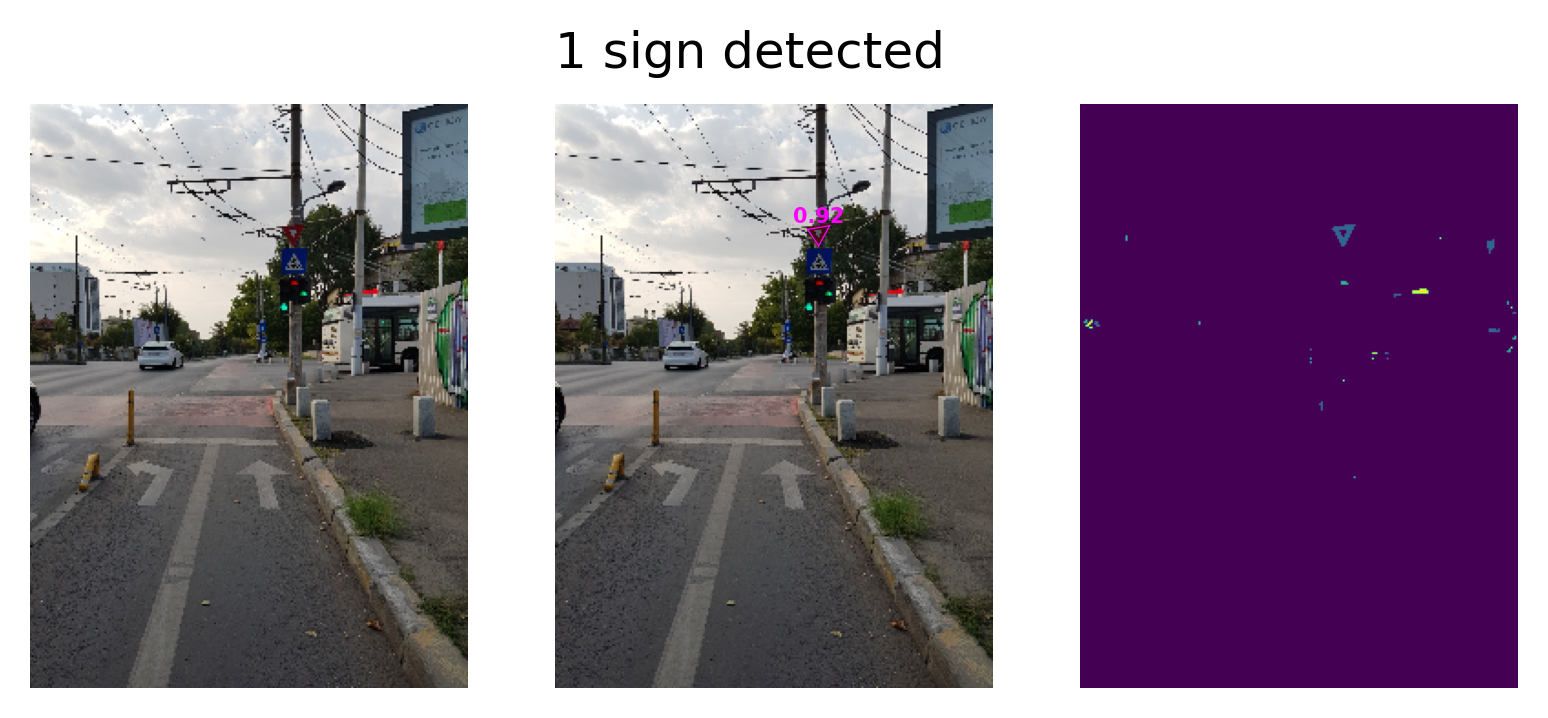

signs detedted 3


In [8]:
print(len(gw_images))
scores = []

total_detected = 0

avg_time = 0
time_count = 0

for i in range(0, len(gw_images)):
    plt.figure(dpi=300)
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.imshow(gw_images[i])
    print("pic", i)

    start = time.time()
    detections_in_pic, label_mat = detect_gw(gw_images[i])
    total_detected += detections_in_pic
    avg_time += time.time() - start
    time_count += 1
    print("avg time", avg_time/time_count)

    plt.suptitle(str(detections_in_pic) + (" signs" if detections_in_pic != 1 else " sign") + " detected", fontsize=12, y=0.75)
    plt.subplot(1, 3, 3)
    plt.axis('off')
    plt.imshow(label_mat)
    plt.show()

print("signs detedted", total_detected)


In [9]:

########### 800 x 600
# 6 fals pozitive
# 43 true pozitive
# ? poate prea forgiveing cu rosu?

########### 320 x 240
# 19 true positives
# 1 fals positive

###########
# 42 true positives
# 1 false positive

###########
# 65 true positives
# 4 false positives

###########
# 67 true positives
# 0 false positives

# avg time per pic:
# 0.396 inainte
# 0.2244 cu is red pe matrice deja hsv
# 0.1413 fara afisari
